In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("weight-height.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [3]:
df.describe()

,Height,Weight
count,10000.000000,10000.000000
mean,66.367560,161.440357
std,3.847528,32.108439
min,54.263133,64.700127
25%,63.505620,135.818051
50%,66.318070,161.212928
75%,69.174262,187.169525
max,78.998742,269.989699


In [4]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [5]:
df.Height.values

array([73.84701702, 68.78190405, 74.11010539, ..., 63.86799221,
       69.03424313, 61.94424588])

In [6]:
df.Weight.values

array([241.89356318, 162.31047252, 212.74085556, ..., 128.47531878,
       163.85246135, 113.64910268])

# split data into input and output

In [7]:
X = df.Height.values
Y = df.Weight.values
print(len(X))
print(len(Y))

10000
10000


In [8]:
print(X[0])
print(Y[0])

73.847017017515
241.893563180437


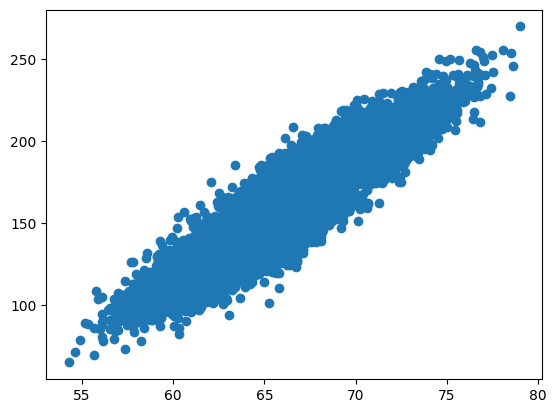

In [9]:
plt.scatter(X,Y)

# Line Function
```
Y = WX + b
```

Algo try to find the W, b

In [10]:
def line(x, w, b = 0):
    return w*x + b

# def line(x, w, b=0):
#     return w*x + b

# loss Function

In [11]:
def mean_squared_error(y_true, y_pred):
    s = (y_true - y_pred) ** 2
    return np.sqrt(s.mean()) # return single number

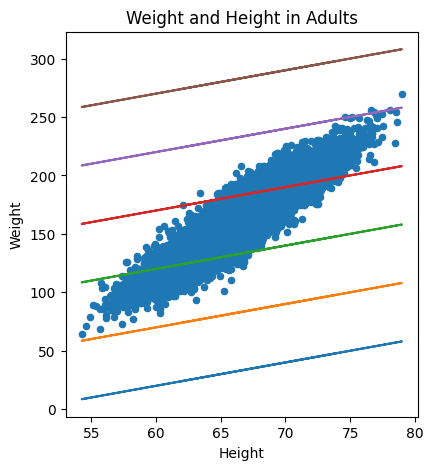

In [12]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)
df.plot(kind='scatter', x = 'Height', y = 'Weight', title= "Weight and Height in Adults", ax = ax1)


# testing
bs = [-100,-50,0,50,100,150]
mses = []
for b in bs:
    y_pred = line(X, 2, b)
    mse = mean_squared_error(Y, y_pred)
    mses.append(mse)
    plt.plot(X,y_pred)
    # break

# plt.figure(figsize=(10,5))
# ax1 = plt.subplot(121)
# df.plot(kind='scatter',
#       x='Height',
#       y='Weight',
#       title="Weight and Height in Adults",
#       ax=ax1)

# bs = [-100,-50,0,50,100,150]
# mses = []
# for b in bs:
#     y_pred = line(X,2,b)
#     mse = mean_squared_error(Y,y_pred)
#     mses.append(mse)
#     plt.plot(X,y_pred)
# #     break

# ax2 = plt.subplot(122)
# ax2.plot(bs,mses,'o-')
# plt.title("Cost as function of b")
# plt.xlabel("B")

```
a= (Σy)(Σx2) - (Σx)(Σxy)/ n(Σx2) - (Σx)2
```
```
b= n (Σxy) - (Σx)(Σy) /n(Σx2) - (Σx)2
```

In [13]:
def linear_regression(x, y):     
    N = len(x)
    x_mean = x.mean()
    y_mean = y.mean()
    
    B1_num = ((x - x_mean) * (y - y_mean)).sum()
    B1_den = ((x - x_mean)**2).sum()
    B1 = B1_num / B1_den
    
    B0 = y_mean - (B1*x_mean)
    
    reg_line = 'y = {} + {}β'.format(B0, round(B1, 3))
    
    return (B0, B1, reg_line)

In [14]:
def corr_coef(x, y):
    N = len(x)
    
    num = (N * (x*y).sum()) - (x.sum() * y.sum())
    den = np.sqrt((N * (x**2).sum() - x.sum()**2) * (N * (y**2).sum() - y.sum()**2))
    R = num / den
    return R

In [15]:
B0, B1, reg_line = linear_regression(X, Y)
print('Regression Line: ', reg_line)
R = corr_coef(X, Y)
print('Correlation Coef.: ', R)
print('"Goodness of Fit": ', R**2)

Regression Line:  y = -350.737191812137 + 7.717β
Correlation Coef.:  0.9247562987409265
"Goodness of Fit":  0.8551742120610176


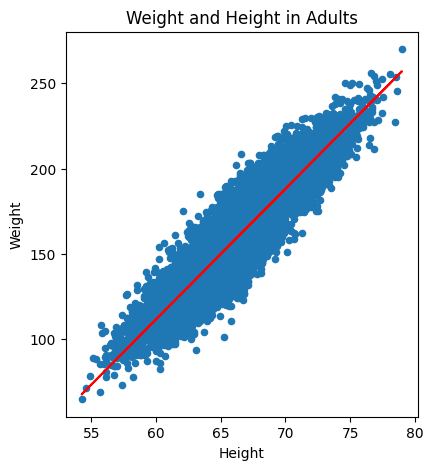

In [16]:
plt.figure(figsize=(10,5))
ax1 = plt.subplot(121)
df.plot(kind='scatter', x = 'Height', y = 'Weight', title= "Weight and Height in Adults", ax = ax1)


# here sir have passed the machine learning predicted value of w and b
# bs = [-100,-50,0,50,100,150]
# mses = []
# for b in bs:
y_pred = line(X, 7.6609, -348.16)
    # mse = mean_squared_error(Y, y_pred)
    # mses.append(mse)
plt.plot(X,y_pred,'r')

In [ ]:
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))